In [45]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = "shopping_behavior_updated.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

(None,
    Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
 0            1   55   Male         Blouse  Clothing                     53   
 1            2   19   Male        Sweater  Clothing                     64   
 2            3   50   Male          Jeans  Clothing                     73   
 3            4   21   Male        Sandals  Footwear                     90   
 4            5   45   Male         Blouse  Clothing                     49   
 
         Location Size      Color  Season  Review Rating Subscription Status  \
 0       Kentucky    L       Gray  Winter            3.1                 Yes   
 1          Maine    L     Maroon  Winter            3.1                 Yes   
 2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
 3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
 4         Oregon    M  Turquoise  Spring            2.7                 Yes   
 
    Shipping Type Discount Applied 

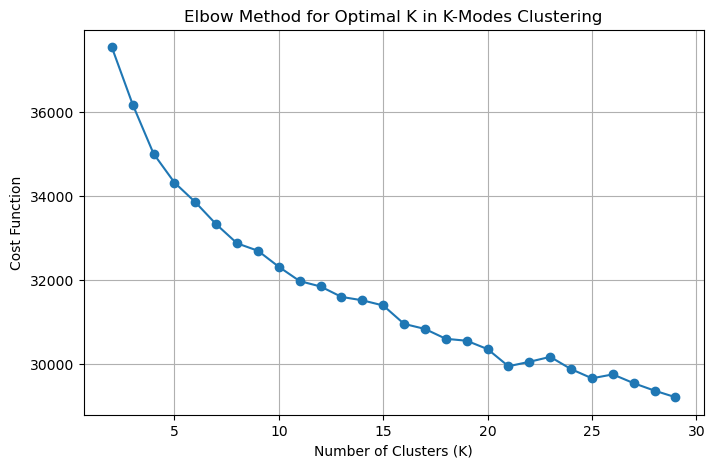

In [47]:
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder

# Drop Customer ID (not useful for clustering)
df_cleaned = df.drop(columns=["Customer ID"])

# Convert numerical features to categorical bins
df_cleaned["Age"] = pd.cut(df_cleaned["Age"], bins=[0, 25, 40, 60, 100], labels=["Young", "Adult", "Middle-aged", "Senior"])
df_cleaned["Purchase Amount (USD)"] = pd.cut(df_cleaned["Purchase Amount (USD)"], bins=[0, 50, 100, 200, 500], labels=["Low", "Medium", "High", "Very High"])
df_cleaned["Review Rating"] = pd.cut(df_cleaned["Review Rating"], bins=[0, 2, 3, 4, 5], labels=["Poor", "Fair", "Good", "Excellent"])
df_cleaned["Previous Purchases"] = pd.cut(df_cleaned["Previous Purchases"], bins=[0, 5, 20, 50, 100], labels=["New", "Occasional", "Frequent", "Loyal"])

# Encode categorical features using label encoding
label_encoders = {}
for col in df_cleaned.columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Determine the optimal number of clusters using cost function trend
costs = []
K_range = range(2, 30)
for k in K_range:
    km = KModes(n_clusters=k, init="Huang", n_init=5, verbose=0)
    clusters = km.fit_predict(df_cleaned)
    costs.append(km.cost_)

# Plot the cost function to determine the optimal number of clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(K_range, costs, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Cost Function")
plt.title("Elbow Method for Optimal K in K-Modes Clustering")
plt.grid(True)
plt.show()


# Product Related

/var/folders/jz/vbj9q0ys27jgyyn1w08d7c940000gn/T/ipykernel_15265/1092430485.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod[col] = le.fit_transform(df_prod[col])
/var/folders/jz/vbj9q0ys27jgyyn1w08d7c940000gn/T/ipykernel_15265/1092430485.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod[col] = le.fit_transform(df_prod[col])
/var/folders/jz/vbj9q0ys27jgyyn1w08d7c940000gn/T/ipykernel_15265/1092430485.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

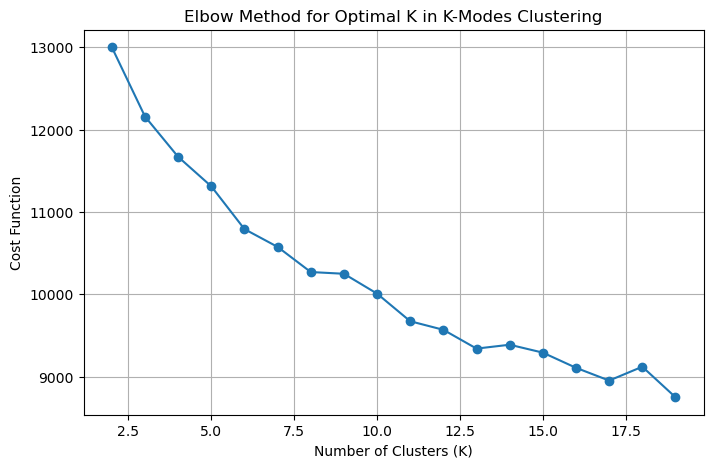

/var/folders/jz/vbj9q0ys27jgyyn1w08d7c940000gn/T/ipykernel_15265/1092430485.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod["Cluster"] = kmodes_model.fit_predict(df_prod)


ModuleNotFoundError: No module named 'ace_tools'

In [25]:
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "shopping_behavior_updated.csv"
df = pd.read_csv(file_path)

# Select only production-related fields
production_features = [
    "Item Purchased", "Category", "Size", "Color", "Season"#, 
    # "Review Rating", "Discount Applied", "Promo Code Used"
]
df_prod = df[production_features]

# Convert numerical features (Review Rating) to categorical bins
# df_prod["Review Rating"] = pd.cut(
#     df_prod["Review Rating"], bins=[0, 2, 3, 4, 5], labels=["Poor", "Fair", "Good", "Excellent"]
# )

# Encode categorical variables
label_encoders = {}
for col in df_prod.columns:
    le = LabelEncoder()
    df_prod[col] = le.fit_transform(df_prod[col])
    label_encoders[col] = le

# Determine the optimal number of clusters using the elbow method
costs = []
K_range = range(2, 20)
for k in K_range:
    km = KModes(n_clusters=k, init="Huang", n_init=5, verbose=0)
    clusters = km.fit_predict(df_prod)
    costs.append(km.cost_)

# Plot the cost function to find the optimal K
plt.figure(figsize=(8, 5))
plt.plot(K_range, costs, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Cost Function")
plt.title("Elbow Method for Optimal K in K-Modes Clustering")
plt.grid(True)
plt.show()

# Apply K-Modes clustering with optimal K (assume 4 for now, replace based on the plot)
optimal_k = 4
kmodes_model = KModes(n_clusters=optimal_k, init="Huang", n_init=5, verbose=0)
df_prod["Cluster"] = kmodes_model.fit_predict(df_prod)



In [27]:
km = KModes(n_clusters=8, init="Huang", n_init=5, verbose=0)
clusters = km.fit_predict(df_prod)
costs.append(km.cost_)

In [31]:
df_prod['prod_cluster'] = clusters

/var/folders/jz/vbj9q0ys27jgyyn1w08d7c940000gn/T/ipykernel_15265/2760882778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod['prod_cluster'] = clusters


In [35]:
df_prod

,Item Purchased,Category,Size,Color,Season,Cluster,prod_cluster
0,2,1,0,7,3,0,4
1,23,1,0,12,3,0,4
2,11,1,2,12,1,0,4
3,14,2,1,12,1,1,1
4,2,1,1,21,1,0,4
...,...,...,...,...,...,...,...
3895,9,1,0,21,2,0,4
3896,0,0,0,23,1,0,4
3897,1,0,0,8,1,0,4
3898,17,2,2,3,2,1,1


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns



In [43]:
df_prod[df_prod['prod_cluster'] == 4]

,Item Purchased,Category,Size,Color,Season,Cluster,prod_cluster
0,2,1,0,7,3,0,4
1,23,1,0,12,3,0,4
2,11,1,2,12,1,0,4
4,2,1,1,21,1,0,4
7,18,1,0,4,3,0,4
...,...,...,...,...,...,...,...
3889,5,1,2,24,1,0,4
3891,5,1,0,15,3,0,4
3895,9,1,0,21,2,0,4
3896,0,0,0,23,1,0,4


In [61]:
list(label_encoders['Item Purchased'].inverse_transform(df_prod['Item Purchased']))

[2,
 23,
 11,
 14,
 2,
 20,
 16,
 18,
 4,
 7,
 17,
 18,
 4,
 5,
 4,
 19,
 22,
 5,
 23,
 13,
 13,
 13,
 13,
 13,
 10,
 9,
 12,
 18,
 7,
 5,
 12,
 5,
 10,
 13,
 24,
 2,
 24,
 11,
 5,
 13,
 7,
 15,
 4,
 15,
 8,
 21,
 16,
 12,
 16,
 9,
 2,
 19,
 24,
 19,
 4,
 10,
 0,
 4,
 9,
 1,
 23,
 15,
 20,
 22,
 3,
 0,
 2,
 4,
 7,
 1,
 1,
 5,
 5,
 13,
 6,
 15,
 8,
 5,
 19,
 10,
 14,
 17,
 13,
 5,
 4,
 22,
 9,
 17,
 24,
 10,
 8,
 15,
 10,
 23,
 19,
 20,
 6,
 17,
 11,
 9,
 22,
 4,
 21,
 3,
 22,
 0,
 10,
 20,
 21,
 24,
 0,
 1,
 6,
 8,
 4,
 19,
 17,
 14,
 23,
 4,
 8,
 18,
 0,
 23,
 23,
 18,
 18,
 23,
 15,
 5,
 15,
 19,
 0,
 23,
 8,
 14,
 2,
 20,
 19,
 4,
 16,
 6,
 10,
 4,
 17,
 12,
 19,
 17,
 6,
 13,
 3,
 22,
 16,
 9,
 5,
 21,
 18,
 8,
 16,
 6,
 6,
 0,
 22,
 19,
 7,
 7,
 20,
 6,
 17,
 10,
 16,
 18,
 12,
 8,
 17,
 4,
 0,
 9,
 19,
 3,
 14,
 13,
 6,
 19,
 20,
 24,
 0,
 17,
 9,
 2,
 4,
 8,
 17,
 1,
 0,
 10,
 3,
 15,
 12,
 8,
 5,
 2,
 8,
 15,
 20,
 16,
 24,
 6,
 19,
 14,
 10,
 19,
 7,
 7,
 10,
 15,
 18,
 22,
 2

/var/folders/jz/vbj9q0ys27jgyyn1w08d7c940000gn/T/ipykernel_15265/2410378245.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod["Review Rating"] = pd.cut(
/var/folders/jz/vbj9q0ys27jgyyn1w08d7c940000gn/T/ipykernel_15265/2410378245.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod[col] = le.fit_transform(df_prod[col])
/var/folders/jz/vbj9q0ys27jgyyn1w08d7c940000gn/T/ipykernel_15265/2410378245.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

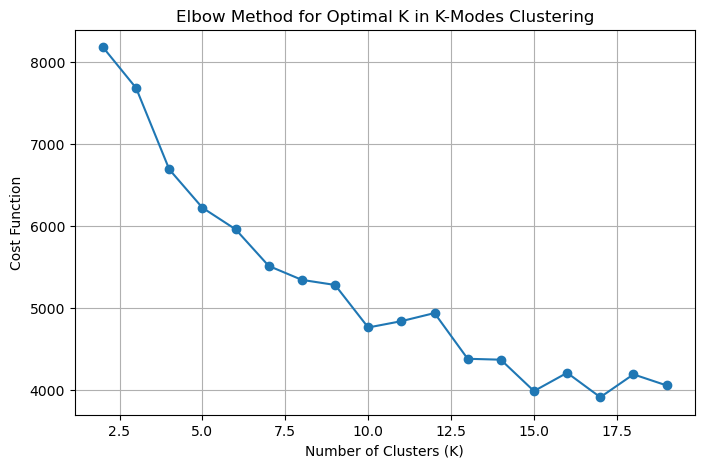

/var/folders/jz/vbj9q0ys27jgyyn1w08d7c940000gn/T/ipykernel_15265/2410378245.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod["prod_cluster"] = kmodes_model.fit_predict(df_prod)
/var/folders/jz/vbj9q0ys27jgyyn1w08d7c940000gn/T/ipykernel_15265/2410378245.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_composition = df_prod.groupby("prod_cluster").apply(lambda x: x.mode().iloc[0]).apply(decode_cluster, axis=1)
/var/folders/jz/vbj9q0ys2

In [84]:
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "shopping_behavior_updated.csv"
df = pd.read_csv(file_path)

# Select only production-related fields
production_features = [
    "Item Purchased", "Category",
    "Review Rating", "Discount Applied", "Promo Code Used"
]
df_prod = df[production_features]

# Convert numerical features (Review Rating) to categorical bins
df_prod["Review Rating"] = pd.cut(
    df_prod["Review Rating"], bins=[0, 2, 3, 4, 5], labels=["Poor", "Fair", "Good", "Excellent"]
)

# Encode categorical variables
label_encoders = {}
for col in df_prod.columns:
    le = LabelEncoder()
    df_prod[col] = le.fit_transform(df_prod[col])
    label_encoders[col] = le

# Determine the optimal number of clusters using the elbow method
costs = []
K_range = range(2, 20)
for k in K_range:
    km = KModes(n_clusters=k, init="Huang", n_init=5, verbose=0)
    clusters = km.fit_predict(df_prod)
    costs.append(km.cost_)

# Plot the cost function to find the optimal K
plt.figure(figsize=(8, 5))
plt.plot(K_range, costs, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Cost Function")
plt.title("Elbow Method for Optimal K in K-Modes Clustering")
plt.grid(True)
plt.show()



In [ ]:
# Apply K-Modes clustering with optimal K (assume 4 for now, replace based on the plot)
optimal_k = 6
kmodes_model = KModes(n_clusters=optimal_k, init="Huang", n_init=5, verbose=0)
df_prod["prod_cluster"] = kmodes_model.fit_predict(df_prod)

# Decode cluster composition back to human-readable values
def decode_cluster(row):
    for col in df_prod.columns:
        if col in label_encoders:
            row[col] = label_encoders[col].inverse_transform([row[col]])[0]
    return row

cluster_composition = df_prod.groupby("prod_cluster").apply(lambda x: x.mode().iloc[0]).apply(decode_cluster, axis=1)

# Investigate clustering results
cluster_counts = df_prod["prod_cluster"].value_counts()
cluster_summary = df_prod.groupby("prod_cluster").mean()


In [86]:
cluster_composition

,Item Purchased,Category,Review Rating,Discount Applied,Promo Code Used,prod_cluster
prod_cluster,,,,,,
0,Belt,Accessories,Excellent,Yes,Yes,0
1,Sandals,Footwear,Excellent,Yes,Yes,1
2,Skirt,Clothing,Good,Yes,Yes,2
3,Socks,Clothing,Good,No,No,3
4,Sunglasses,Accessories,Excellent,No,No,4
5,Sandals,Footwear,Fair,Yes,Yes,5
6,Scarf,Accessories,Fair,Yes,Yes,6
7,Dress,Clothing,Excellent,No,No,7
8,Shirt,Clothing,Fair,No,No,8
